In [1]:
import pickle

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from stable_baselines3 import TD3
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

In [2]:
env = gym.make("Pendulum-v1", render_mode="rgb_array")

In [3]:
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(
    mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions)
)

In [4]:
def save_frames_as_gif(frames, path="./", filename="gym_animation.gif"):
    plt.figure(
        figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72
    )
    patch = plt.imshow(frames[0])
    plt.axis("off")

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(
        plt.gcf(), animate, frames=len(frames), interval=50
    )
    anim.save(path + filename, writer="imagemagick", fps=60)

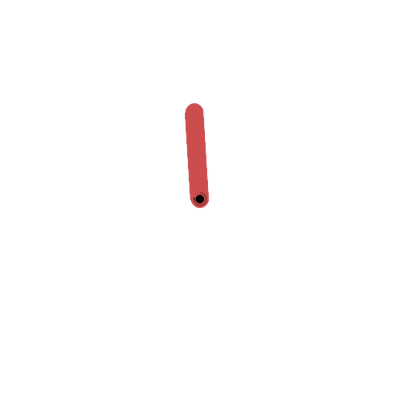

In [5]:
model = TD3.load("models/td3_pendulum")

with open("models/td3_env.pkl", "rb") as handle:
    vec_env = pickle.load(handle)

obs = vec_env.reset()
frames = []
for t in range(100):
    frames.append(vec_env.render())
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)

save_frames_as_gif(frames, "./gifs/", "td3_pendulum.gif")